# Preprocessing for Evaluation
To evaluate the trust mining method, we use several bpmn diagrams, mesaure their features, mining time and metrics and compare them

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
pd.set_option('display.max_rows', None)

This is the first dataset from BPMN 6219 and from the Unicam set. See here: https://ieee-dataport.org/documents/6219-pairs-bpmn-images-and-definition-files

In [3]:
bpmn_6219 = pd.read_csv("../evaluation_bpmn6219.csv")

In [4]:
bpmn_81 = pd.read_csv("../evaluation_bpmn81.csv")

In [5]:
bpmn_6219_81 = bpmn_6219.append(bpmn_81)

In [6]:
len(bpmn_6219_81)

6300

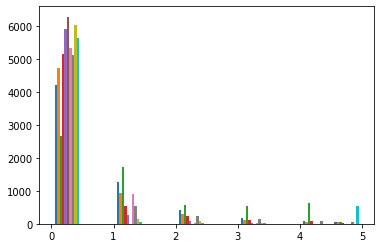

In [7]:
plt.hist(bpmn_6219_81[['endEventRequiredErrors',
                       'startEventRequiredErrors', 'fakeJoinErrors', 'noDisconnectedErrors',
                       'superfluousGatewayErrors', 'subProcessBlankStartEventErrors',
                       'noGatewayJoinForkErrors', 'noImplicitSplitErrors',
                       'noInclusiveGatewayErrors', 'conditionalFlowErrors']], range=(0,5))
plt.show()

In [8]:
bpmn_6219_81[['endEventRequiredErrors',
                       'startEventRequiredErrors', 'fakeJoinErrors', 'noDisconnectedErrors',
                       'superfluousGatewayErrors', 'subProcessBlankStartEventErrors',
                       'noGatewayJoinForkErrors', 'noImplicitSplitErrors',
                       'noInclusiveGatewayErrors', 'conditionalFlowErrors']].sum()

endEventRequiredErrors             4352
startEventRequiredErrors           3188
fakeJoinErrors                     8179
noDisconnectedErrors               3342
superfluousGatewayErrors            507
subProcessBlankStartEventErrors       7
noGatewayJoinForkErrors            1047
noImplicitSplitErrors              2848
noInclusiveGatewayErrors            473
conditionalFlowErrors              2956
dtype: int64

In [9]:
acceptable_bpmn_6219_81_df = bpmn_6219_81[(bpmn_6219_81['endEventRequiredErrors'] == 0) & 
                                          (bpmn_6219_81['startEventRequiredErrors'] == 0) &
                                          (bpmn_6219_81['noDisconnectedErrors'] == 0) &
                                          #(bpmn_6219_81['superfluousGatewayErrors'] == 0) &
                                          (bpmn_6219_81['subProcessBlankStartEventErrors'] == 0) &
                                          (bpmn_6219_81['noGatewayJoinForkErrors'] == 0) &
                                          (bpmn_6219_81['noImplicitSplitErrors'] == 0) &
                                          (bpmn_6219_81['noInclusiveGatewayErrors'] == 0) &
                                          (bpmn_6219_81['conditionalFlowErrors'] == 0) #&
                                          #(bpmn_6219_81['fakeJoinErrors'] == 0)
                                         ]

In [10]:
usable_bpmn_6219_81_df = acceptable_bpmn_6219_81_df[acceptable_bpmn_6219_81_df["modelNP"]>1]
len(usable_bpmn_6219_81_df)

852

In [11]:
usable_bpmn_6219_81_df['tapeAvgRLU'] = usable_bpmn_6219_81_df['tapeALU'] / (usable_bpmn_6219_81_df['tapeGU'])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
unique_bpmn_6219_81_df = usable_bpmn_6219_81_df.drop_duplicates(subset=['modelIsValidBPMN', 'modelTNT', 'modelTNCS', 'modelTNA', 
                                                             'modelTNDO', 'modelTNG', 'modelTNEE', 'modelTNIE', 'modelTNSE',
                                                             'modelTNE', 'modelTNSF', 'modelNP', 'modelNL', 'modelCLA', 'modelCLP',
                                                             'modelPDOPin', 'modelPDOPout', 'modelPDOTOut', 'modelPLT', 'tapeGU',
                                                             'tapeLUB', 'tapeAvgLUB',
                                                             'tapeAvgDI', 'tapeAvgDD', 'tapeAvgMI', 'tapeAvgMD',
                                                             'applicationDomain', 'endEventRequiredErrors',
                                                             'startEventRequiredErrors', 'fakeJoinErrors', 'noDisconnectedErrors',
                                                             'superfluousGatewayErrors', 'subProcessBlankStartEventErrors',
                                                             'noGatewayJoinForkErrors', 'noImplicitSplitErrors',
                                                             'noInclusiveGatewayErrors', 'conditionalFlowErrors'], keep='first')
len(unique_bpmn_6219_81_df)

137

In [13]:
usable_bpmn_6219_81_df.columns

Index(['fileName', 'modelIsValidBPMN', 'applicationDomain', 'modelTNT',
       'modelTNCS', 'modelTNA', 'modelTNDO', 'modelTNG', 'modelTNEE',
       'modelTNIE', 'modelTNSE', 'modelTNE', 'modelTNSF', 'modelNP', 'modelNL',
       'modelCLA', 'modelCLP', 'modelPDOPin', 'modelPDOPout', 'modelPDOTOut',
       'modelPLT', 'tapeGU', 'tapeALU', 'tapeRLU', 'tapeLUB', 'tapeAvgLUB',
       'tapeDI', 'tapeDD', 'tapeAvgDI', 'tapeAvgDD', 'tapeMI', 'tapeMD',
       'tapeAvgMI', 'tapeAvgMD', 'tapeExecutionTimeMs',
       'endEventRequiredErrors', 'startEventRequiredErrors', 'fakeJoinErrors',
       'noDisconnectedErrors', 'superfluousGatewayErrors',
       'subProcessBlankStartEventErrors', 'noGatewayJoinForkErrors',
       'noImplicitSplitErrors', 'noInclusiveGatewayErrors',
       'conditionalFlowErrors', 'tapeAvgRLU'],
      dtype='object')

In [14]:
application_groups = unique_bpmn_6219_81_df.groupby('applicationDomain').count()
application_groups.sort_values('fileName')

,fileName,modelIsValidBPMN,modelTNT,modelTNCS,modelTNA,modelTNDO,modelTNG,modelTNEE,modelTNIE,modelTNSE,modelTNE,modelTNSF,modelNP,modelNL,modelCLA,modelCLP,modelPDOPin,modelPDOPout,modelPDOTOut,modelPLT,tapeGU,tapeALU,tapeRLU,tapeLUB,tapeAvgLUB,tapeDI,tapeDD,tapeAvgDI,tapeAvgDD,tapeMI,tapeMD,tapeAvgMI,tapeAvgMD,tapeExecutionTimeMs,endEventRequiredErrors,startEventRequiredErrors,fakeJoinErrors,noDisconnectedErrors,superfluousGatewayErrors,subProcessBlankStartEventErrors,noGatewayJoinForkErrors,noImplicitSplitErrors,noInclusiveGatewayErrors,conditionalFlowErrors,tapeAvgRLU
applicationDomain,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Manufacturing,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Politics,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Academics,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Digital Platforms,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Identity Verification,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,3,2,2,3,3,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,2
Mobility,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
E-Commerce,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,2,2,4,2,2,4,4,2,2,4,4,4,4,4,4,4,4,4,4,4,4,4,2
HR,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,4,3,3,4,4,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,3
IoT,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


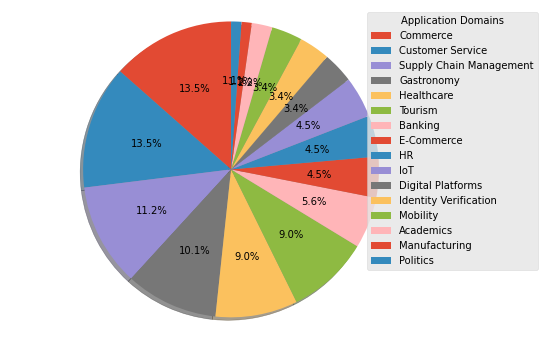

In [15]:
plt.style.use('ggplot')

application_groups = unique_bpmn_6219_81_df.groupby('applicationDomain').count().sort_values('fileName', ascending=False)

labels = application_groups.index
sizes = application_groups['fileName']

fig1, ax1 = plt.subplots()
wedges, texts, autotexts = ax1.pie(sizes, labels=None, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(wedges, labels,
          title="Application Domains",
          loc="best",
          bbox_to_anchor=(0.7, 0, 0.5, 1))
ax1.figure.set_size_inches(8, 6)
plt.savefig("../plots/pie_application_domains.pdf")
plt.show()

In [16]:
#valid_bpmn_6219_81_df = bpmn_6219_81[bpmn_6219_81["modelIsValidBPMN"]]
#len(valid_bpmn_6219_81_df)

In [74]:
unique_bpmn_6219_81_df['modelTotalProcessElements'] = unique_bpmn_6219_81_df['modelTNA'] + unique_bpmn_6219_81_df['modelTNG'] + unique_bpmn_6219_81_df['modelTNE'] + unique_bpmn_6219_81_df['modelTNSE'] + unique_bpmn_6219_81_df['modelTNEE'] + unique_bpmn_6219_81_df['modelTNDO']

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
unique_bpmn_6219_81_df.head()

,fileName,modelIsValidBPMN,applicationDomain,modelTNT,modelTNCS,modelTNA,modelTNDO,modelTNG,modelTNEE,modelTNIE,modelTNSE,modelTNE,modelTNSF,modelNP,modelNL,modelCLA,modelCLP,modelPDOPin,modelPDOPout,modelPDOTOut,modelPLT,tapeGU,tapeALU,tapeRLU,tapeLUB,tapeAvgLUB,tapeDI,tapeDD,tapeAvgDI,tapeAvgDD,tapeMI,tapeMD,tapeAvgMI,tapeAvgMD,tapeExecutionTimeMs,endEventRequiredErrors,startEventRequiredErrors,fakeJoinErrors,noDisconnectedErrors,superfluousGatewayErrors,subProcessBlankStartEventErrors,noGatewayJoinForkErrors,noImplicitSplitErrors,noInclusiveGatewayErrors,conditionalFlowErrors,tapeAvgRLU,modelTotalProcessElements
5,00005.bpmn,True,Customer Service,15,0,15,0,4,3,1,1,3,27,3,5,0.555556,1.000000,0.0,0.0,0.0,0.333333,211,70.333333,"0.6113744075829384,0.25118483412322273,0.13744...","0.27804107424960506,-0.08214849921011058,-0.19...",9.251859e-18,"0,0,0","0,0,0",0,0,"2,1,0","1,1,1",1.000000,1.000000,46.121494,0,0,3,0,0,0,0,0,0,0,0.333333,26
13,00013.bpmn,True,Tourism,11,0,11,0,2,2,3,3,2,20,2,0,0.550000,4.000000,0.0,0.0,0.0,0.000000,0,0.000000,NaN,NaN,0.000000e+00,NaN,NaN,0,0,NaN,NaN,0.000000,0.000000,22.819357,0,0,2,0,0,0,0,0,0,0,NaN,20
14,00014.bpmn,True,Tourism,11,0,11,0,2,3,4,4,2,21,2,0,0.523810,3.000000,0.0,0.0,0.0,0.000000,163,81.500000,"0.4049079754601227,0.5950920245398773","-0.0950920245398773,0.0950920245398773",0.000000e+00,"0,0","0,0",0,0,"1,1","1,1",1.000000,1.000000,35.124959,0,0,1,0,0,0,0,0,0,0,0.500000,22
18,00018.bpmn,True,NaN,15,0,15,0,4,3,1,1,3,27,3,5,0.555556,1.000000,0.0,0.0,0.0,0.333333,211,70.333333,"0.6113744075829384,0.25118483412322273,0.13744...","0.27804107424960506,-0.08214849921011058,-0.19...",9.251859e-18,"0,0,0","0,0,0",0,0,"2,1,0","1,1,1",1.000000,1.000000,30.960546,0,0,3,0,0,0,0,0,0,0,0.333333,26
79,00079.bpmn,False,E-Commerce,12,0,12,1,9,5,7,7,4,37,3,3,0.324324,2.333333,0.0,0.0,0.0,0.250000,260,86.666667,"0.5307692307692308,0.3730769230769231,0.096153...","0.19743589743589746,0.03974358974358977,-0.237...",1.850372e-17,"0,0,0","0,0,0",0,0,"2,1,1","2,1,1",1.333333,1.333333,42.456582,0,0,0,0,0,0,0,0,0,0,0.333333,38


In [76]:
usable_bpmn_6219_81_df["modelNP"].unique()

array([ 3,  2,  4,  5, 11,  9,  7,  6, 13,  8, 12, 14, 10])

## Characteristics
To get an overview over the raw dataset, we use violin plots to show the distribution of certain characteristics in the models and compare them later to the Metrics introduced with Trust Mining.

The violin plots use a *kernel density estimator* with a width of 8 to smoothen the unequally distributed features.

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
static_characteristics = unique_bpmn_6219_81_df[['modelTNT', 'modelTNCS', 'modelTNA',
                                                'modelTNDO', 'modelTNG', 'modelTNEE', 'modelTNIE', 'modelTNSE',
                                                'modelTNE', 'modelTNSF', 'modelNP', 'modelNL', 'modelCLA', 'modelCLP',
                                                'modelPDOPin', 'modelPDOPout', 'modelPDOTOut', 'modelPLT', 'tapeGU',
                                                'tapeALU', 'tapeRLU', 'tapeLUB', 'tapeAvgLUB',
                                                'tapeAvgDI', 'tapeAvgDD', 'tapeAvgMI', 'tapeAvgMD',
                                                'tapeExecutionTimeMs', 'applicationDomain', 'endEventRequiredErrors',
                                                'startEventRequiredErrors', 'fakeJoinErrors', 'noDisconnectedErrors',
                                                'superfluousGatewayErrors', 'subProcessBlankStartEventErrors',
                                                'noGatewayJoinForkErrors', 'noImplicitSplitErrors',
                                                'noInclusiveGatewayErrors', 'conditionalFlowErrors']]

In [79]:
raw_model_characteristics_with_activities = unique_bpmn_6219_81_df[['modelTNA','modelTNDO', 'modelTNG',
                                                'modelTNE', 'modelNP', 'modelNL', 'modelCLA', 'modelCLP']]
raw_model_characteristics_with_activities.describe().round(2)

,modelTNA,modelTNDO,modelTNG,modelTNE,modelNP,modelNL,modelCLA,modelCLP
count,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00
mean,11.36,1.00,2.79,3.18,3.03,1.56,0.59,1.41
std,6.17,2.23,4.01,2.37,2.35,1.87,0.13,1.16
min,3.00,0.00,0.00,1.00,2.00,0.00,0.30,0.00
25%,7.00,0.00,0.00,2.00,2.00,0.00,0.50,0.50
50%,10.00,0.00,2.00,2.00,2.00,0.00,0.57,1.00
75%,14.00,1.00,4.00,3.00,3.00,3.00,0.69,2.00
max,46.00,13.00,38.00,14.00,14.00,7.00,1.00,4.50


In [80]:
raw_model_characteristics_with_activities.describe().round(2).to_csv('../raw_model_characteristics.csv')

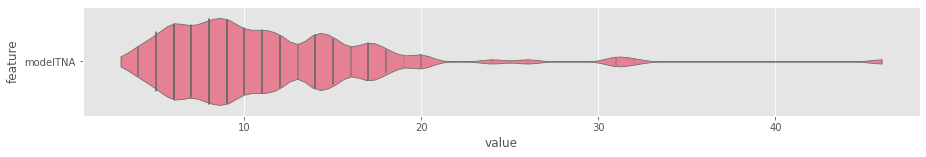

In [81]:
raw_model_characteristics_activities = unique_bpmn_6219_81_df[['modelTNA']].dropna()
raw_model_characteristics_activities_series_stacked = raw_model_characteristics_activities.stack()
raw_model_characteristics_activities_series_stacked.index = raw_model_characteristics_activities_series_stacked.index.droplevel(level=0)
raw_model_characteristics_activities_df = pd.DataFrame(raw_model_characteristics_activities_series_stacked).reset_index()
raw_model_characteristics_activities_df.columns = ['feature', 'value']
ax = sns.violinplot(x="value", y="feature", data=raw_model_characteristics_activities_df, scale="count", palette="husl", width=0.8, cut=0, inner="stick", bw=0.1, linewidth=0.8)
ax.figure.set_size_inches(15, len(raw_model_characteristics_activities_df["feature"].unique())*2)

In [82]:
raw_model_characteristics = unique_bpmn_6219_81_df[['modelTNDO', 'modelTNG',
                                                'modelTNE', 'modelNP', 'modelNL', 'modelCLA', 'modelCLP']].dropna()

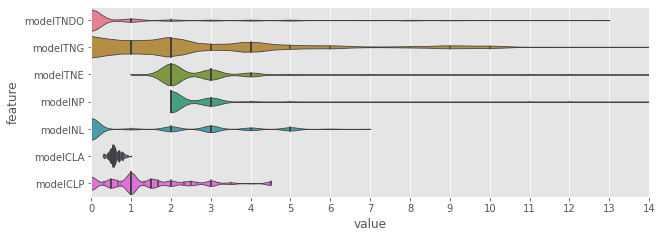

In [83]:
raw_model_characteristics_series_stacked = raw_model_characteristics.stack()
raw_model_characteristics_series_stacked.index = raw_model_characteristics_series_stacked.index.droplevel(level=0)
raw_model_df = pd.DataFrame(raw_model_characteristics_series_stacked).reset_index()
raw_model_df.columns = ['feature', 'value']
ax = sns.violinplot(x="value", y="feature", data=raw_model_df, scale="count", palette="husl", width=0.8, cut=0, inner="stick", bw=0.1, linewidth=0.8)
ax.figure.set_size_inches(10, len(raw_model_df["feature"].unique())/2)
ax.set_xlim(0,14)
ax.set_xticks(np.arange(0,15))
plt.savefig("../plots/violin_raw_model_characteristics.pdf")

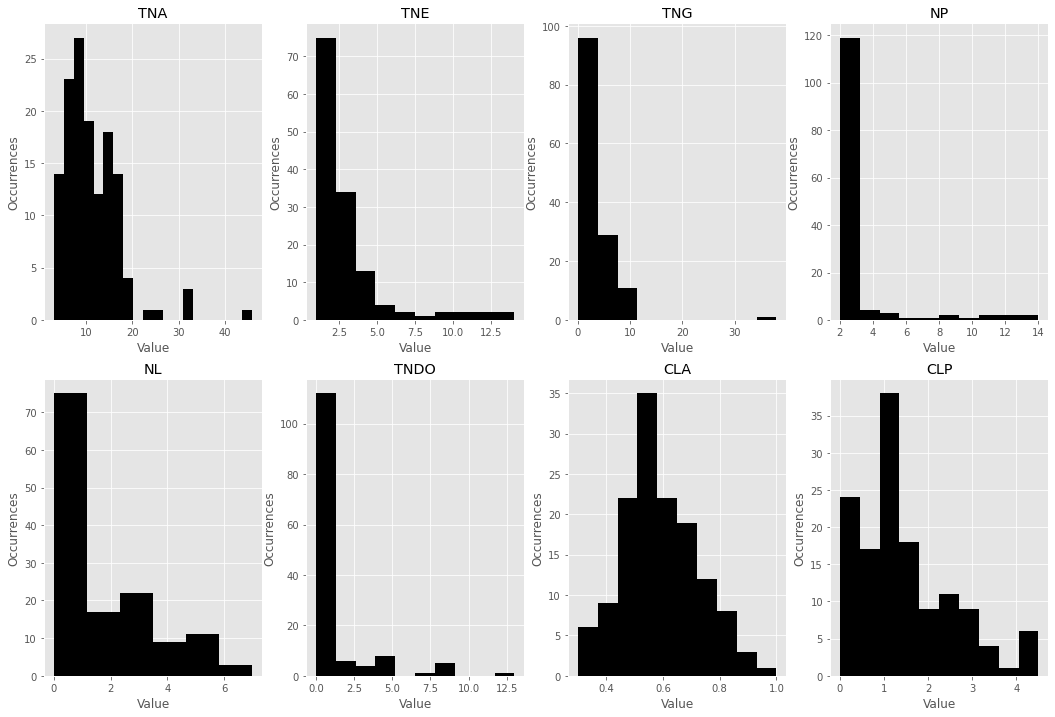

In [84]:
fig, axs = plt.subplots(2, 4)
fig.set_size_inches(18, 12)
#fig.suptitle('Distribution')
axs[0, 0] = raw_model_characteristics_with_activities['modelTNA'].hist(bins=20, ax=axs[0, 0], color='k')
axs[0, 0].set_title('TNA')
axs[0, 0].set_ylabel('Occurrences')
axs[0, 0].set_xlabel('Value')

axs[0, 1] = raw_model_characteristics_with_activities['modelTNE'].hist(ax=axs[0, 1], color='k')
axs[0, 1].set_title('TNE')
axs[0, 1].set_ylabel('Occurrences')
axs[0, 1].set_xlabel('Value')

axs[0, 2] = raw_model_characteristics_with_activities['modelTNG'].hist(ax=axs[0, 2], color='k')
axs[0, 2].set_title('TNG')
axs[0, 2].set_ylabel('Occurrences')
axs[0, 2].set_xlabel('Value')

axs[0, 3] = raw_model_characteristics_with_activities['modelNP'].hist(ax=axs[0, 3], color='k')
axs[0, 3].set_title('NP')
axs[0, 3].set_ylabel('Occurrences')
axs[0, 3].set_xlabel('Value')

axs[1, 0] = raw_model_characteristics_with_activities['modelNL'].hist(ax=axs[1, 0], bins=6, color='k')
axs[1, 0].set_title('NL')
axs[1, 0].set_ylabel('Occurrences')
axs[1, 0].set_xlabel('Value')

axs[1, 1] = raw_model_characteristics_with_activities['modelTNDO'].hist(ax=axs[1, 1], color='k')
axs[1, 1].set_title('TNDO')
axs[1, 1].set_ylabel('Occurrences')
axs[1, 1].set_xlabel('Value')

axs[1, 2] = raw_model_characteristics_with_activities['modelCLA'].hist(ax=axs[1, 2], color='k')
axs[1, 2].set_title('CLA')
axs[1, 2].set_ylabel('Occurrences')
axs[1, 2].set_xlabel('Value')

axs[1, 3] = raw_model_characteristics_with_activities['modelCLP'].hist(ax=axs[1, 3], color='k')
axs[1, 3].set_title('CLP')
axs[1, 3].set_ylabel('Occurrences')
axs[1, 3].set_xlabel('Value')

plt.savefig("../plots/hist_raw_model_characteristics.pdf")

## TAPE characteristics

In [92]:
trust_characteristics = unique_bpmn_6219_81_df[['tapeGU', 'tapeALU', 'tapeAvgRLU', 'tapeAvgLUB', 'tapeAvgDD', 'tapeAvgMD', 'tapeExecutionTimeMs', 'modelTotalProcessElements', 'modelTNSF']].dropna()

In [86]:
trust_characteristics.describe().round(2)

,tapeGU,tapeALU,tapeAvgRLU,tapeAvgLUB,tapeAvgDD,tapeAvgMD,tapeExecutionTimeMs,modelTotalProcessElements
count,106.00,106.00,106.00,106.0,106.0,106.00,106.00,106.00
mean,156.23,55.18,0.40,0.0,0.0,0.97,22.94,23.28
std,102.36,28.30,0.13,0.0,0.0,0.28,16.67,13.92
min,14.00,4.67,0.07,-0.0,0.0,0.33,5.67,8.00
25%,91.75,35.38,0.33,-0.0,0.0,1.00,13.18,15.00
50%,127.50,48.08,0.50,0.0,0.0,1.00,18.41,20.00
75%,210.50,67.83,0.50,0.0,0.0,1.00,28.53,26.00
max,862.00,172.40,0.50,0.0,0.0,1.80,115.65,122.00


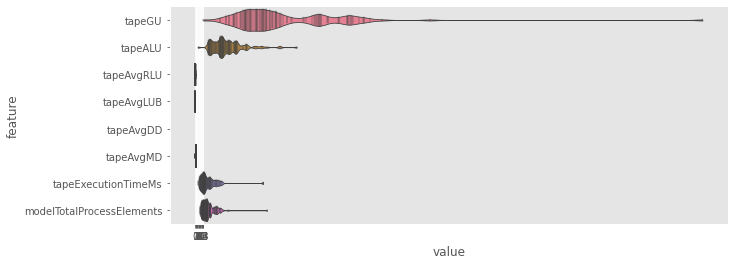

In [87]:
trust_characteristics_stacked = trust_characteristics.stack()
trust_characteristics_stacked.index = trust_characteristics_stacked.index.droplevel(level=0)
trust_characteristics_model_df = pd.DataFrame(trust_characteristics_stacked).reset_index()
trust_characteristics_model_df.columns = ['feature', 'value']
ax = sns.violinplot(x="value", y="feature", data=trust_characteristics_model_df, scale="count", palette="husl", width=0.8, cut=0, inner="stick", bw=0.1, linewidth=0.8)
ax.figure.set_size_inches(10, len(trust_characteristics_model_df["feature"].unique())/2)
#ax.set_xlim(0,14)
ax.set_xticks(np.arange(0,15))

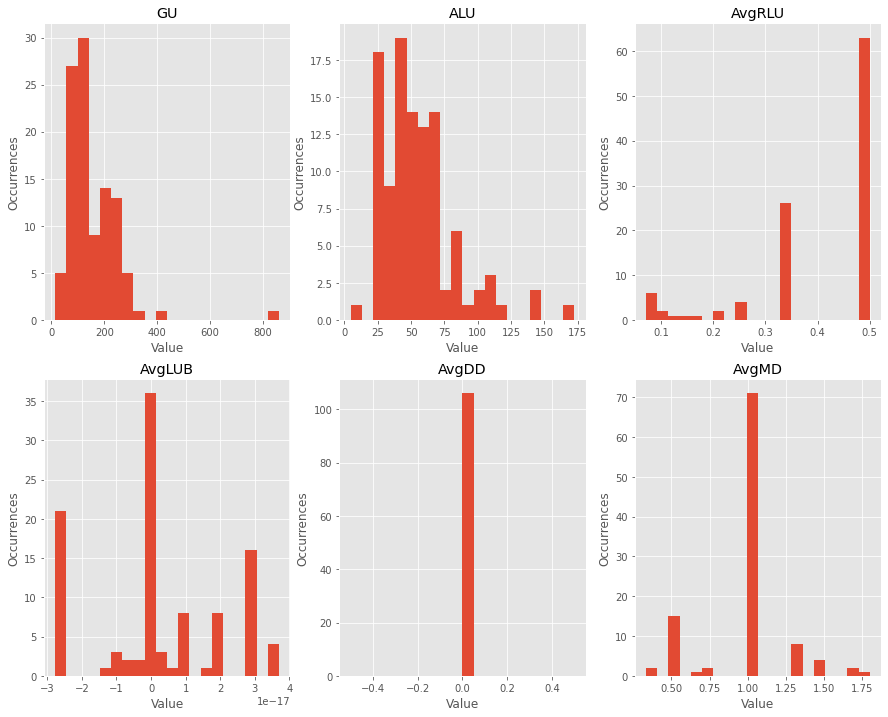

In [88]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(15, 12)
#fig.suptitle('Distribution')
axs[0, 0] = trust_characteristics['tapeGU'].hist(label='GU', bins=20, ax=axs[0, 0])
axs[0, 0].set_title('GU')
axs[0, 0].set_ylabel('Occurrences')
axs[0, 0].set_xlabel('Value')

axs[0, 1] = trust_characteristics['tapeALU'].hist(label='ALU', bins=20, ax=axs[0, 1])
axs[0, 1].set_title('ALU')
axs[0, 1].set_ylabel('Occurrences')
axs[0, 1].set_xlabel('Value')

axs[0, 2] = trust_characteristics['tapeAvgRLU'].hist(label='avg RLU', bins=20, ax=axs[0, 2])
axs[0, 2].set_title('AvgRLU')
axs[0, 2].set_ylabel('Occurrences')
axs[0, 2].set_xlabel('Value')

axs[1, 0] = trust_characteristics['tapeAvgLUB'].hist(label='avg LUB', bins=20, ax=axs[1, 0])
axs[1, 0].set_title('AvgLUB')
axs[1, 0].set_ylabel('Occurrences')
axs[1, 0].set_xlabel('Value')

axs[1, 1] = trust_characteristics['tapeAvgDD'].hist(label='avg DD', bins=20, ax=axs[1, 1])
axs[1, 1].set_title('AvgDD')
axs[1, 1].set_ylabel('Occurrences')
axs[1, 1].set_xlabel('Value')

axs[1, 2] = trust_characteristics['tapeAvgMD'].hist(label='avg MD', bins=20, ax=axs[1, 2])
axs[1, 2].set_title('AvgMD')
axs[1, 2].set_ylabel('Occurrences')
axs[1, 2].set_xlabel('Value')

plt.savefig("../plots/hist_tape_characteristics.pdf")

In [71]:
trust_characteristics.describe()

,tapeGU,tapeALU,tapeAvgRLU,tapeAvgLUB,tapeAvgDD,tapeAvgMD,tapeExecutionTimeMs
count,106.000000,106.000000,106.000000,1.060000e+02,106.0,106.000000,106.000000
mean,156.226415,55.179746,0.402916,1.869541e-18,0.0,0.972956,22.941355
std,102.357104,28.304854,0.134103,1.902596e-17,0.0,0.279715,16.665215
min,14.000000,4.666667,0.071429,-2.775558e-17,0.0,0.333333,5.671945
25%,91.750000,35.375000,0.333333,-5.798586e-18,0.0,1.000000,13.181494
50%,127.500000,48.083333,0.500000,0.000000e+00,0.0,1.000000,18.409672
75%,210.500000,67.833333,0.500000,1.850372e-17,0.0,1.000000,28.532379
max,862.000000,172.400000,0.500000,3.700743e-17,0.0,1.800000,115.654637


In [90]:
trust_characteristics.head()

,tapeGU,tapeALU,tapeAvgRLU,tapeAvgLUB,tapeAvgDD,tapeAvgMD,tapeExecutionTimeMs,modelTotalProcessElements
5,211,70.333333,0.333333,9.251859e-18,0,1.000000,46.121494,26
14,163,81.500000,0.500000,0.000000e+00,0,1.000000,35.124959,22
18,211,70.333333,0.333333,9.251859e-18,0,1.000000,30.960546,26
79,260,86.666667,0.333333,1.850372e-17,0,1.333333,42.456582,38
80,260,86.666667,0.333333,1.850372e-17,0,1.333333,40.041172,38


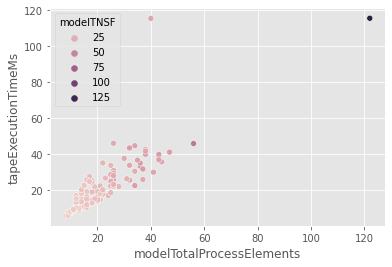

In [95]:
sns.scatterplot(data=trust_characteristics, x="modelTotalProcessElements", y="tapeExecutionTimeMs", hue="modelTNSF")
plt.savefig("../plots/scatter_tape_execution_time.pdf")

<AxesSubplot:>

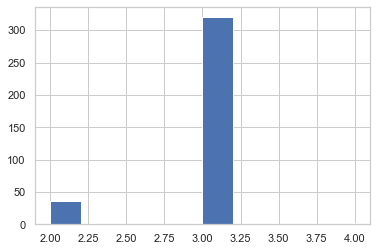

In [220]:
usable_bpmn_6219_81_df["modelNP"].hist()

In [94]:
unique_bpmn_6219_81_df.describe()

,modelTNT,modelTNCS,modelTNA,modelTNDO,modelTNG,modelTNEE,modelTNIE,modelTNSE,modelTNE,modelTNSF,modelNP,modelNL,modelCLA,modelCLP,modelPDOPin,modelPDOPout,modelPDOTOut,modelPLT,tapeGU,tapeALU,tapeAvgLUB,tapeAvgDI,tapeAvgDD,tapeAvgMI,tapeAvgMD,tapeExecutionTimeMs,endEventRequiredErrors,startEventRequiredErrors,fakeJoinErrors,noDisconnectedErrors,superfluousGatewayErrors,subProcessBlankStartEventErrors,noGatewayJoinForkErrors,noImplicitSplitErrors,noInclusiveGatewayErrors,conditionalFlowErrors,tapeAvgRLU,modelTotalProcessElements
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02,137.0,137.0,137.000000,137.000000,137.000000,137.0,137.0,137.000000,137.0,137.000000,137.0,137.0,137.0,137.0,137.0,106.000000,137.000000
mean,10.686131,0.021898,11.357664,1.000000,2.788321,3.854015,1.058394,1.058394,3.182482,20.525547,3.029197,1.562044,0.593120,1.412044,0.029620,0.210561,0.094616,0.151519,120.875912,42.693818,1.446506e-18,0.0,0.0,0.747932,0.752798,22.373275,0.0,0.0,0.708029,0.0,0.058394,0.0,0.0,0.0,0.0,0.0,0.402916,23.240876
std,6.306803,0.146887,6.168870,2.226181,4.006301,2.647252,2.148072,2.148072,2.373936,14.525880,2.345025,1.870284,0.134992,1.163698,0.103704,0.383673,0.440760,0.194389,111.325136,33.993204,1.673594e-17,0.0,0.0,0.481090,0.476822,15.420135,0.0,0.0,1.105871,0.0,0.378977,0.0,0.0,0.0,0.0,0.0,0.134103,13.635230
min,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,5.000000,2.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.775558e-17,0.0,0.0,0.000000,0.000000,5.661749,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.071429,8.000000
25%,7.000000,0.000000,7.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,12.000000,2.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,52.000000,22.714286,0.000000e+00,0.0,0.0,0.500000,0.500000,13.045844,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.333333,15.000000
50%,9.000000,0.000000,10.000000,0.000000,2.000000,3.000000,0.000000,0.000000,2.000000,17.000000,2.000000,0.000000,0.571429,1.000000,0.000000,0.000000,0.000000,0.000000,106.000000,42.666667,0.000000e+00,0.0,0.0,1.000000,1.000000,18.655022,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.500000,20.000000
75%,14.000000,0.000000,14.000000,1.000000,4.000000,4.000000,1.000000,1.000000,3.000000,26.000000,3.000000,3.000000,0.687500,2.000000,0.000000,0.000000,0.000000,0.333333,185.000000,60.000000,9.251859e-18,0.0,0.0,1.000000,1.000000,28.677504,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.500000,26.000000
max,46.000000,1.000000,46.000000,13.000000,38.000000,14.000000,17.000000,17.000000,14.000000,134.000000,14.000000,7.000000,1.000000,4.500000,0.666667,1.000000,5.000000,0.800000,862.000000,172.400000,3.700743e-17,0.0,0.0,1.800000,1.800000,115.654637,0.0,0.0,4.000000,0.0,3.000000,0.0,0.0,0.0,0.0,0.0,0.500000,122.000000


In [558]:
import sys
!{sys.executable} -m pip install mpltools

     |████████████████████████████████| 829kB 4.0MB/s eta 0:00:01     |████████▊                       | 225kB 4.0MB/s eta 0:00:01
  Created wheel for mpltools: filename=mpltools-0.2.0-cp37-none-any.whl size=35687 sha256=71ae31414063957f5d1295b18b93285701740e9ac04ad38addef082f3fe35e1e
  Stored in directory: /Users/marcelmuller/Library/Caches/pip/wheels/0c/ee/93/dc1d50835c2eb347f3c9592b2e7226a61c18aec87703e493de
  Created wheel for configobj: filename=configobj-5.0.6-cp37-none-any.whl size=34547 sha256=1b84614401466aa4b42197cfc12c2dbf0bad6080d3e9bde31dfffd82b3cfcfce
  Stored in directory: /Users/marcelmuller/Library/Caches/pip/wheels/f1/e4/16/4981ca97c2d65106b49861e0b35e2660695be7219a2d351ee0
  Created wheel for future: filename=future-0.18.2-cp37-none-any.whl size=491057 sha256=6cc9d6931bb7fe15fc5afa8faaf34a213aff36244c231c1d2487ee07f9620dd1
  Stored in directory: /Users/marcelmuller/Library/Caches/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully buil